In [4]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [5]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

594

In [6]:
#Perform API Calls
#Perform a weather check on each city using a series of successive API calls.
#Include a print log of each city as it'sbeing processed (with the city number and city name).

# Set up the URL.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# setting up lists to hold reponse info
City = []
Cloudiness = []
Country = []
Date = []
Humidity = []
Lat = []
Lng = []
Max_temp = []
Wind_Speed = []
city_number = 0

# Looping through the list of cities and requesting for data on each
print("Beginning Data Retrieval ")
print("----------------------------")
for city in cities:
    response = requests.get(query_url + city).json()
    time.sleep(1)
    #city_number+= city_number
    try:
        City.append(response['name'])
        Cloudiness.append(response['clouds']['all'])
        Country.append(response['sys']['country'])
        Date.append(response['dt'])
        Humidity.append(response['main']['humidity'])
        Lat.append(response['coord']['lat'])
        Lng.append(response['coord']['lon'])
        Max_temp.append(response['main']['temp_max'])
        Wind_Speed.append(response['wind']['speed'])
        print(f"Processing Record {len(City)} of Set 1 | {city}")
    except KeyError:
        print("City not found. Skipping...")
        pass
    
   




Beginning Data Retrieval 
----------------------------
Processing Record 1 of Set 1 | thompson
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | rikitea
Processing Record 4 of Set 1 | hobart
Processing Record 5 of Set 1 | provideniya
Processing Record 6 of Set 1 | albany
Processing Record 7 of Set 1 | nabire
Processing Record 8 of Set 1 | padang
Processing Record 9 of Set 1 | port alfred
Processing Record 10 of Set 1 | whitehorse
Processing Record 11 of Set 1 | cikupa
Processing Record 12 of Set 1 | pisco
Processing Record 13 of Set 1 | avera
Processing Record 14 of Set 1 | barrow
Processing Record 15 of Set 1 | tuktoyaktuk
Processing Record 16 of Set 1 | mataura
Processing Record 17 of Set 1 | puerto ayora
Processing Record 18 of Set 1 | ushuaia
City not found. Skipping...
Processing Record 19 of Set 1 | quatre cocos
Processing Record 20 of Set 1 | clonakilty
Processing Record 21 of Set 1 | kodiak
Processing Record 22 of Set 1 | kruisfontein
Processing Record 23 of 

In [7]:
#Export the city data into a .csv.
#Display the DataFrame

weather_data = pd.DataFrame({"City":City,"Cloudiness":Cloudiness,"Country":Country,"Date":Date,
                             "Humidity":Humidity,"Lat":Lat,"Lng":Lng,"Max Temp":Max_temp,"Wind Speed":Wind_Speed})

weather_data.to_csv("output_data_file", index=False, header=True)

weather_data

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Thompson,90,CA,1583681837,56,55.74,-97.86,-26.00,6.20
1,Avarua,100,CK,1583681965,94,-21.21,-159.78,25.00,2.10
2,Rikitea,100,PF,1583681966,82,-23.12,-134.97,26.07,4.92
3,Hobart,90,AU,1583681864,71,-42.88,147.33,12.00,2.60
4,Provideniya,16,RU,1583681968,95,64.38,-173.30,-22.03,1.93
...,...,...,...,...,...,...,...,...,...
538,Batticaloa,0,LK,1583682623,87,7.71,81.69,23.07,0.75
539,Petropavlovskaya,0,RU,1583682625,51,45.08,40.45,17.27,2.60
540,Bonavista,100,CA,1583682626,93,48.65,-53.11,-1.83,16.01
541,Haines Junction,100,CA,1583682628,97,60.75,-137.51,-13.33,3.75


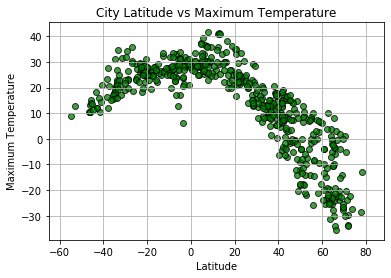

In [17]:
#Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
#Save the plotted figures as .pngs.

#Latitude vs. Temperature Plot
x_axis = weather_data["Lat"]
y_axis = weather_data["Max Temp"]
plt.xlim((weather_data["Lat"]).min()-10,(weather_data["Lat"]).max()+10)
plt.grid()
plt.title("City Latitude vs Maximum Temperature")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
plt.scatter(x_axis,y_axis, marker="o", facecolors="green", edgecolors="black", alpha=0.75)

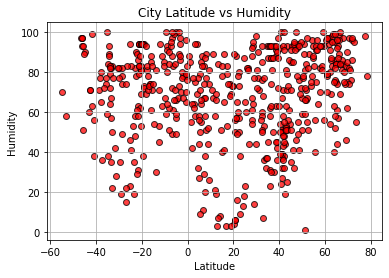

In [16]:
#Latitude vs. Humidity Plot

x_axis = weather_data["Lat"]
y_axis = weather_data["Humidity"]
plt.grid()
plt.title("City Latitude vs Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.scatter(x_axis,y_axis, marker="o", facecolors="red", edgecolors="black", alpha=0.75)

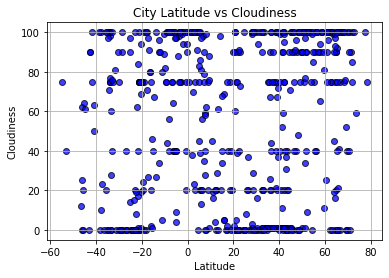

In [15]:
#Latitude vs. Cloudiness Plot

x_axis = weather_data["Lat"]
y_axis = weather_data["Cloudiness"]
plt.grid()
plt.title("City Latitude vs Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.scatter(x_axis,y_axis, marker="o", facecolors="blue", edgecolors="black",
            alpha=0.75)

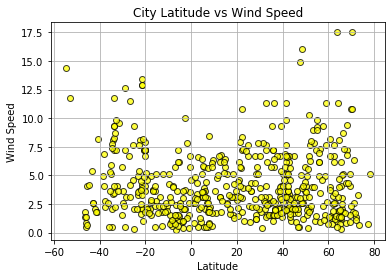

In [14]:
#Latitude vs. Wind Speed Plot

x_axis = weather_data["Lat"]
y_axis = weather_data["Wind Speed"]
plt.grid()
plt.title("City Latitude vs Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.scatter(x_axis,y_axis, marker="o", facecolors="yellow", edgecolors="black",alpha=0.75)

The r-squared is: -0.8837761155060699


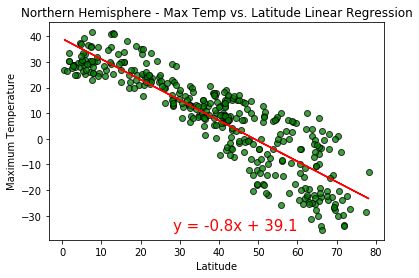

In [57]:
# Creating a function to create Linear Regression plots


def linear_regression(x_values,y_values,color):
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
    print(f"The r-squared is: {rvalue}")
    regress_value = x_values*slope + intercept
    plt.scatter(x_values,y_values, marker="o", facecolors=color, edgecolors="black",alpha=0.75)
    plt.plot(x_values,regress_value,"r-")
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.annotate(line_eq,(x_values.max()-50,y_values.min()),fontsize=15,color='red')

# Creating Northern and Southern Hemisphere DataFrames    

#Northern Hemishere DataFrame
Data_north = weather_data.loc[weather_data["Lat"]>0,:]

#Southern Hemishere DataFrame
Data_south = weather_data.loc[weather_data["Lat"]<0,:]


#Northern Hemisphere - Max Temp vs. Latitude Linear Regression

plt.title("Northern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
linear_regression(Data_north["Lat"],Data_north["Max Temp"],"green")

The r-squared is: 0.5911005664436826


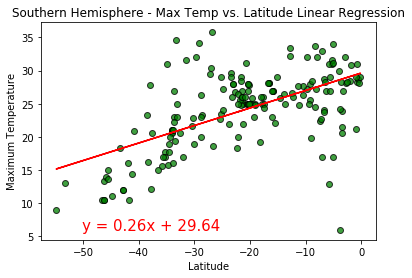

In [56]:
#Southern Hemisphere - Max Temp vs. Latitude Linear Regression


plt.title("Southern Hemisphere - Max Temp vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature")
linear_regression(Data_south["Lat"],Data_south["Max Temp"],"green")

The r-squared is: 0.34150894923092395


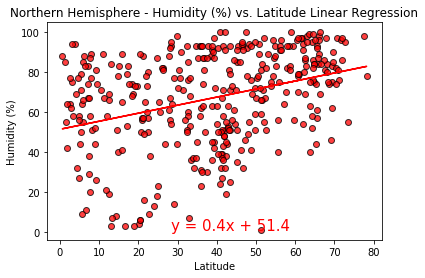

In [55]:
#Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression


plt.title("Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
linear_regression(Data_north["Lat"],Data_north["Humidity"],"red")

The r-squared is: 0.14106159972704926


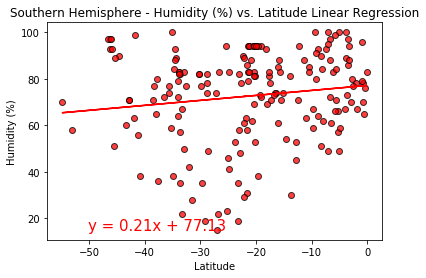

In [54]:
#Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression


plt.title("Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
linear_regression(Data_south["Lat"],Data_south["Humidity"],"red")

The r-squared is: 0.21166041050178033


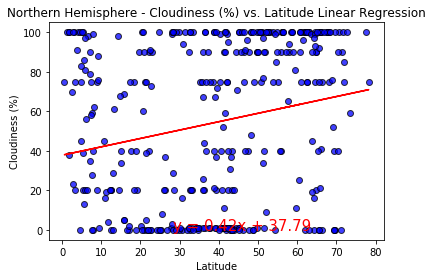

In [50]:
#Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

plt.title("Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
linear_regression(Data_north["Lat"],Data_north["Cloudiness"],"blue")

The r-squared is: 0.28587659357376116


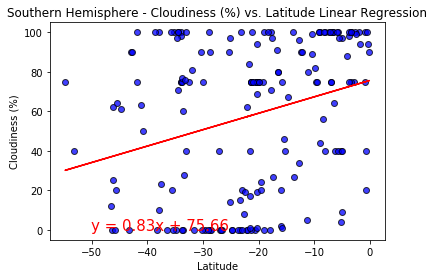

In [51]:
#Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title("Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression")
linear_regression(Data_south["Lat"],Data_south["Cloudiness"],"blue")

The r-squared is: 0.08653780162280966


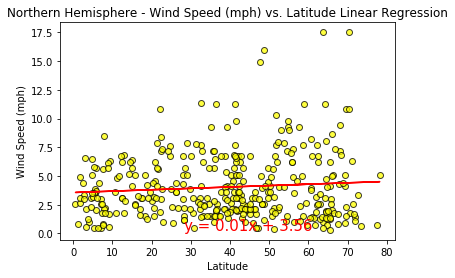

In [52]:
#Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
linear_regression(Data_north["Lat"],Data_north["Wind Speed"],"Yellow")

The r-squared is: -0.2557252676136048


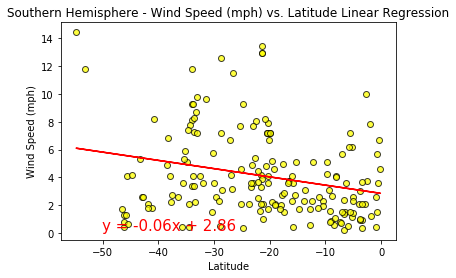

In [53]:
#Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title("Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression")
linear_regression(Data_south["Lat"],Data_south["Wind Speed"],"Yellow")